In [1]:
# import the libraries 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
df=pd.read_csv('종목별장애인스포츠활성정보.csv',encoding='cp949')

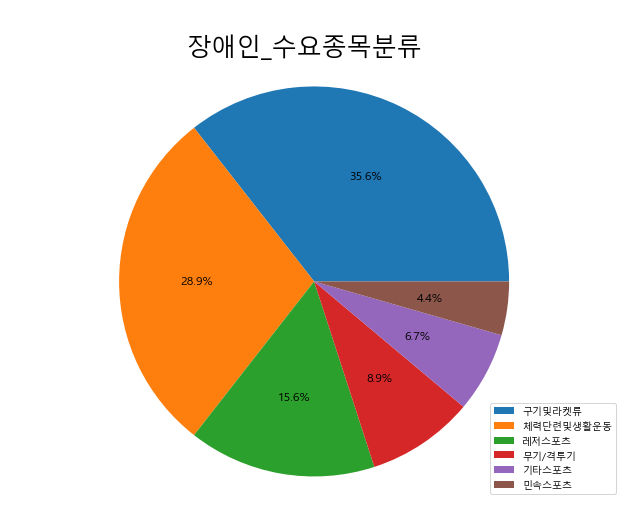

In [2]:
# 대분류 카테고리 비율 
labels=['구기및라켓류','체력단련및생활운동','레저스포츠','무기/격투기','기타스포츠','민속스포츠']
fig1, ax1= plt.subplots(figsize=(11,8))
fig1.suptitle('\n장애인_수요종목분류\n\n',fontsize=25)
patches,texts,autotexts=ax1.pie(df['수요운동종목대분류명'].value_counts(), autopct='%1.1f%%', textprops={'fontsize':12})
ax1.axis('equal')
ax1.legend(labels,loc=4)
plt.show()

In [3]:
# 운동경험자 선호 비율 파생변수 
df['운동경험자선호비율']=(df['운동경험자주요수요비율']+df['운동경험자시간여유선호비율'])/2

In [4]:
df2=df.loc[:,['수요운동종목소분류명','운동경험자선호비율','비운동경험자종목선호비율','강좌종목비율']].set_index('수요운동종목소분류명')


In [5]:
df3=df2.sort_values('비운동경험자종목선호비율',ascending=False)
df3=df3[df3['비운동경험자종목선호비율']>1].reset_index()

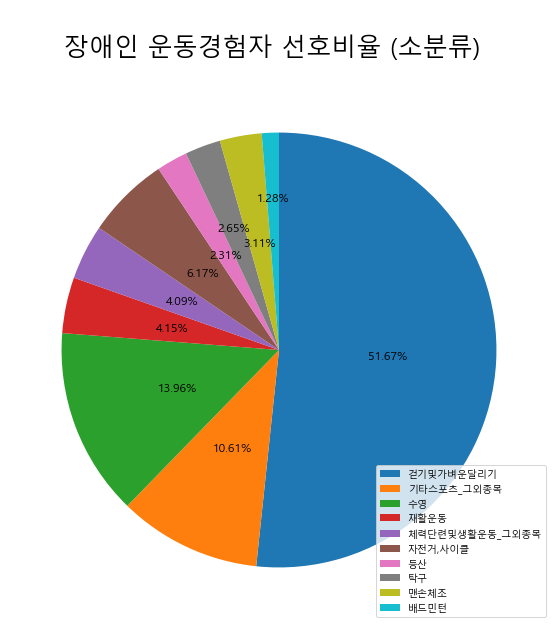

In [13]:
labels=df3['수요운동종목소분류명']
frequency=list(df3['운동경험자선호비율'])
fig, ax= plt.subplots(figsize=(13,10))
# fig = plt.figure(figsize=(13,9)) ## 캔버스 생성
fig.suptitle('\n 장애인 운동경험자 선호비율 (소분류)',fontsize=25)
# ax = fig.add_subplot() ## 프레임 생성
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐   
       )


total = np.sum(frequency)

threshold = 3
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],labels,loc=4) ## 범례
plt.show()

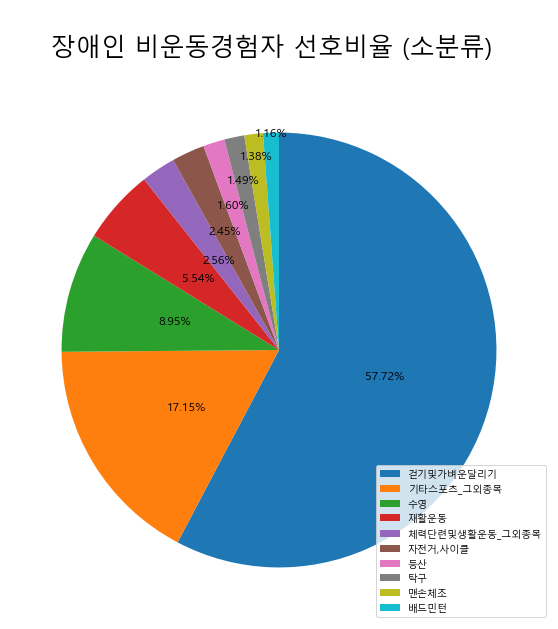

In [62]:
labels=df3['수요운동종목소분류명']
frequency=list(df3['비운동경험자종목선호비율'])
fig, ax= plt.subplots(figsize=(13,10))
fig.suptitle('\n 장애인 비운동경험자 선호비율 (소분류)',fontsize=25)
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐   
       )


total = np.sum(frequency)

threshold = 3
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels5) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{frequency5[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],labels5,loc=4) ## 범례
plt.show()

In [78]:
df3=df2[df2['강좌종목비율']!=0].sort_values(by='강좌종목비율',ascending=False)

In [15]:
df3

,수요운동종목소분류명,운동경험자선호비율,비운동경험자종목선호비율,강좌종목비율
0,걷기및가벼운달리기,44.80,54.2,0.00000
1,기타스포츠_그외종목,9.20,16.1,0.00000
2,수영,12.10,8.4,13.09771
3,재활운동,3.60,5.2,2.70270
4,체력단련및생활운동_그외종목,3.55,2.4,14.55301
5,"자전거,사이클",5.35,2.3,0.00000
6,등산,2.00,1.5,0.00000
7,탁구,2.30,1.4,4.78170
8,맨손체조,2.70,1.3,0.00000
9,배드민턴,1.10,1.1,2.63340


In [80]:
# df3.to_csv("c:/Users/19930/git_project/공모전1/종목비율.csv",encoding='cp949',index=False)

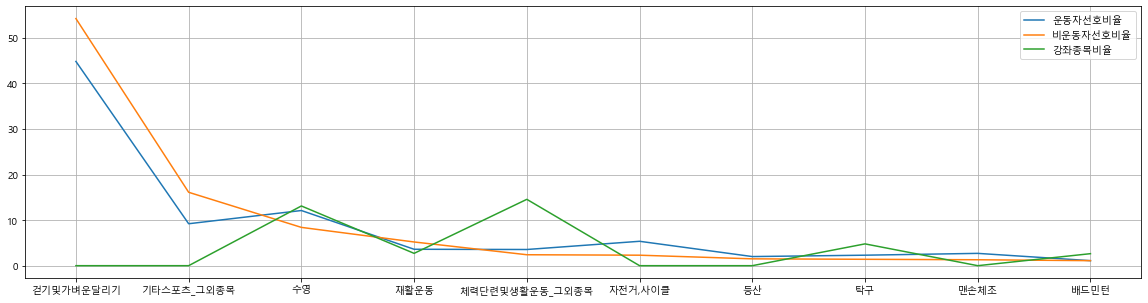

In [21]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.rcParams['axes.grid'] = True
ax=fig.add_subplot()
ax.plot(df3['수요운동종목소분류명'],df3['운동경험자선호비율'],label='운동자선호비율')
ax.plot(df3['수요운동종목소분류명'],df3['비운동경험자종목선호비율'],label='비운동자선호비율')
ax.plot(df3['수요운동종목소분류명'],df3['강좌종목비율'],label='강좌종목비율')
ax.legend()

In [22]:
종목=pd.read_csv("c:/Users/19930/git_project/공모전1/종목비율2.csv",encoding='cp949')

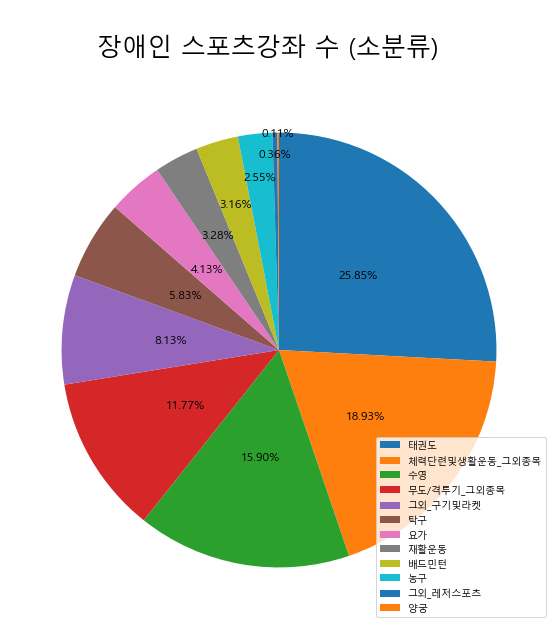

In [24]:
labels4=종목['수요운동종목소분류명']
frequency4=list(종목['강좌종목비율'])
fig, ax= plt.subplots(figsize=(13,10))
# fig = plt.figure(figsize=(13,9)) ## 캔버스 생성
fig.suptitle('\n장애인 스포츠강좌 수 (소분류)',fontsize=25)
# ax = fig.add_subplot() ## 프레임 생성
pie = ax.pie(frequency4, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐   
       )


total = np.sum(frequency4)

threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(labels4):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if frequency4[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels4) - 1:
        sum_pct += float(f'{frequency4[i]/total*100:.2f}')
        ax.text(x,y,f'{frequency4[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],labels4,loc=4) ## 범례
plt.show()